In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
def simulated_boolean_function(x1, x2, x3, x4):
    return int((not (x1 or x2)) or x3 or x4)

In [3]:
X1 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
X2 = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
X3 = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
X4 = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [4]:
Y = np.array([simulated_boolean_function(X1[i], X2[i], X3[i], X4[i]) for i in range(16)])

In [5]:
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [6]:
def loss(y_true, y_predicted):
    return y_true - y_predicted

In [7]:
X_test = [[X1[i], X2[i], X3[i], X4[i]] for i in range(16)]

In [8]:
lr = 0.3
size_of_train = len(X1)
EPOCH_NUMBER = 10
BIG_EPOCH_NUMBER = 50

In [9]:
def predict_for_binary_step(X_test):
    y_predicted = []
    y_predicted = [net.forward(x) for x in X_test]
    return np.array(y_predicted)

In [10]:
def predict_for_softsign(X_test, threshold=0.5):
    y_predicted = []
    y_predicted = [int(net.forward(x) > threshold) for x in X_test]
    return np.array(y_predicted)

# Часть №1: binary step

In [11]:
class BinaryStepNet:
    
    def __init__(self, seed=1):
        np.random.seed(seed)
        self.W = np.zeros(shape=4)
        self.b = 0
#         self.W = np.random.normal(scale=0.1, size=4)
#         self.b = np.random.randint(1)
    
    def forward(self, x):
        self.x = x
        self.net = np.dot(self.W, x) + self.b
        self.binary_step = int(self.net >= 0)
        return self.binary_step
    
    def backward(self, delta, lr=0.01):
        self.dW = np.dot(lr * delta, self.x)
        self.db = lr * delta
        self.W = self.W + self.dW
        self.b = self.b + self.db


	Epoch  0
W =  [0.  0.  0.  0.9]
Y =  [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
E =  6.0

	Epoch  1
W =  [0.  0.  0.6 1.2]
Y =  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
E =  6.0

	Epoch  2
W =  [ 0.  -0.3  0.6  1.2]
Y =  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
E =  1.0

	Epoch  3
W =  [0.  0.  0.9 1.2]
Y =  [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
E =  3.0

	Epoch  4
W =  [ 0.  -0.3  0.9  1.2]
Y =  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
E =  1.0

	Epoch  5
W =  [0.  0.  1.2 1.2]
Y =  [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
E =  3.0

	Epoch  6
W =  [ 0.  -0.3  1.2  1.2]
Y =  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
E =  1.0

	Epoch  7
W =  [-0.3 -0.3  1.2  1.2]
Y =  [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
E =  2.0

	Epoch  8
W =  [-0.3 -0.3  1.2  1.2]
Y =  [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
E =  1.0

	Epoch  9
W =  [-0.3 -0.3  1.2  1.2]
Y =  [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
E =  0.0


Text(0.5, 1.0, 'Error(epoch)')

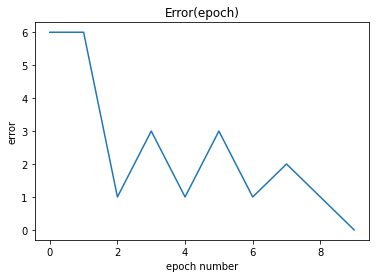

In [12]:
net = BinaryStepNet()
L_iter = []

for epoch in range(EPOCH_NUMBER):
    error = 0.
    print("\n\tEpoch ", epoch)
    Y_predicted = []
    for i in range(size_of_train):
        x = [X1[i], X2[i], X3[i], X4[i]]
        y_true = Y[i]
        y_predicted = net.forward(x)
        delta = loss(y_true, y_predicted)
        error += abs(delta)
        net.backward(delta, lr)
        Y_predicted.append(y_predicted)
    L_iter.append(error)
    print("W = ", net.W)
    print("Y = ", Y_predicted)
    print("E = ", error)
    if (error == 0):
        break

fig, ax = plt.subplots()
ax.plot(L_iter)
ax.set_xlabel('epoch number')
ax.set_ylabel('error')
ax.set_title('Error(epoch)')

# Чаcть №2: softsign

In [13]:
class SoftsignNet:
    
    def __init__(self, seed=1):
        np.random.seed(seed)
        self.W = np.zeros(shape=4)
        self.b = 0
#         self.W = np.random.normal(scale=0.1, size=4)
#         self.b = np.random.randint(1)
    
    def forward(self, x, threshold=0.5):
        self.x = x
        net = np.dot(self.W, x) + self.b
        self.softsign = 0.5 * (net / (1 + abs(net)) + 1)
        return int(self.softsign > threshold)
    
    def backward(self, delta, lr=0.01):
        self.dz = 0.5 / (1 + np.abs(self.softsign) ** 2)
        self.dW = np.dot(lr * delta * self.dz, self.x)
        self.db = lr * delta * self.dz
        self.W = self.W + self.dW
        self.b = self.b + self.db


	Epoch  0
W =  [0.01902876 0.0190569  0.12427648 0.24721059]
Y =  [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
E =  7.0

	Epoch  1
W =  [ 0.02406013 -0.09397401  0.24679862  0.24721059]
Y =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
E =  3.0

	Epoch  2
W =  [0.02775416 0.02677693 0.24679862 0.36796152]
Y =  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
E =  2.0

	Epoch  3
W =  [ 0.02775416 -0.09000761  0.24679862  0.36796152]
Y =  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
E =  1.0

	Epoch  4
W =  [-0.08871984 -0.09000761  0.24679862  0.36796152]
Y =  [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
E =  2.0

	Epoch  5
W =  [-0.08871984 -0.09000761  0.24679862  0.36796152]
Y =  [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
E =  1.0

	Epoch  6
W =  [-0.08871984 -0.09000761  0.24679862  0.36796152]
Y =  [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
E =  0.0


Text(0.5, 1.0, 'Error(epoch)')

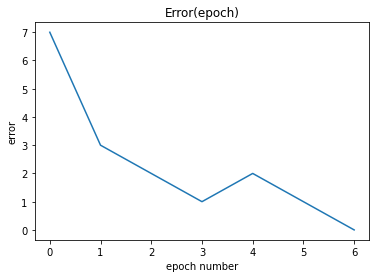

In [14]:
net = SoftsignNet()
L_iter = []

for epoch in range(EPOCH_NUMBER):
    error = 0.
    print("\n\tEpoch ", epoch)
    Y_predicted = []
    for i in range(size_of_train):
        x = [X1[i], X2[i], X3[i], X4[i]]
        y_true = Y[i]
        y_predicted = net.forward(x)
        delta = loss(y_true, y_predicted)
        error += abs(delta)
        net.backward(delta, lr)
        Y_predicted.append(y_predicted)
    L_iter.append(error)
    print("W = ", net.W)
    print("Y = ", Y_predicted)
    print("E = ", error)
    if (error == 0):
        break

fig, ax = plt.subplots()
ax.plot(L_iter)
ax.set_xlabel('epoch number')
ax.set_ylabel('error')
ax.set_title('Error(epoch)')

# Часть №3: binary step, поиск наименьшей комбинации

In [15]:
for number_of_variables in range(15, 0, -1):
    combs = tuple(combinations(range(16), number_of_variables))
    for idxs in combs:
        net = BinaryStepNet()        
        L_iter = []
        for epoch in range(BIG_EPOCH_NUMBER):
            error_on_train = 0.
            Y_predicted = []
            for i in idxs:
                x = [X1[i], X2[i], X3[i], X4[i]]
                y_true = Y[i]
                y_predicted = net.forward(x)
                delta = loss(y_true, y_predicted)
                error_on_train += abs(delta)
                net.backward(delta, lr)
                Y_predicted.append(y_predicted)
            error_on_test = np.sum(loss(predict_for_binary_step(X_test), Y))
            L_iter.append(error_on_test)
            if (error_on_test == 0):
                break
                
        if L_iter[-1] == 0:
            print("Combination of size ", number_of_variables, " found. Indexes : ", idxs)
            break

Combination of size  15  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
Combination of size  14  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)
Combination of size  13  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13)
Combination of size  12  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
Combination of size  11  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Combination of size  10  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Combination of size  9  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8)
Combination of size  8  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 8)
Combination of size  7  found. Indexes :  (0, 1, 2, 3, 4, 8, 15)
Combination of size  6  found. Indexes :  (0, 1, 2, 3, 12, 15)
Combination of size  5  found. Indexes :  (0, 1, 2, 12, 15)
Combination of size  4  found. Indexes :  (0, 1, 12, 15)
Combination of size  3  found. Indexes :  (0, 12, 15)


Проверяем, что на выборке размера 3, состоящей из наборов с индексами 0, 12, 15, нейросеть действительно обучилась и перестала ошибаться на тесте


	Epoch  0
W =  [0.  0.  0.3 0.3]
Y =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
E =  3

	Epoch  1
W =  [0.  0.  0.6 0.6]
Y =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
E =  3

	Epoch  2
W =  [-0.3 -0.3  0.6  0.6]
Y =  [0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1]
E =  3

	Epoch  3
W =  [-0.3 -0.3  0.6  0.6]
Y =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  0

final W =  [-0.3 -0.3  0.6  0.6]


Text(0.5, 1.0, 'Error(epoch)')

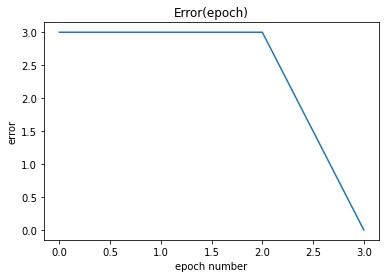

In [16]:
net = BinaryStepNet()        
L_iter = []
idxs = [0, 12, 15]
for epoch in range(EPOCH_NUMBER):
    error_on_train = 0.
    print("\n\tEpoch ", epoch)
    for i in idxs:
        x = [X1[i], X2[i], X3[i], X4[i]]
        y_true = Y[i]
        y_predicted = net.forward(x)
        delta = loss(y_true, y_predicted)
        error_on_train += abs(delta)
        net.backward(delta, lr)
    Y_predicted = predict_for_softsign(X_test)
    error_on_test = np.sum(np.abs(loss(Y_predicted, Y)))
    L_iter.append(error_on_test)
    print("W = ", net.W)
    print("Y = ", Y_predicted)
    print("E = ", error_on_test)
    if (error_on_test == 0):
        break

print("\nfinal W = ", net.W)
fig, ax = plt.subplots()
ax.plot(L_iter)
ax.set_xlabel('epoch number')
ax.set_ylabel('error')
ax.set_title('Error(epoch)')

# Часть №4: softsign, поиск наименьшей комбинации

In [17]:
for number_of_variables in range(15, 0, -1):
    combs = tuple(combinations(range(16), number_of_variables))
    for idxs in combs:
        net = SoftsignNet()        
        L_iter = []
        for epoch in range(BIG_EPOCH_NUMBER):
            error_on_train = 0.
            Y_predicted = []
            for i in idxs:
                x = [X1[i], X2[i], X3[i], X4[i]]
                y_true = Y[i]
                y_predicted = net.forward(x)
                delta = loss(y_true, y_predicted)
                error_on_train += abs(delta)
                net.backward(delta, lr)
                Y_predicted.append(y_predicted)
            error_on_test = np.sum(loss(predict_for_softsign(X_test), Y))
            L_iter.append(error_on_test)
            if (error_on_test == 0):
                break
                
        if L_iter[-1] == 0:
            print("Combination of size ", number_of_variables, " found. Indexes : ", idxs)
            break

Combination of size  15  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
Combination of size  14  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)
Combination of size  13  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13)
Combination of size  12  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
Combination of size  11  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Combination of size  10  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Combination of size  9  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8)
Combination of size  8  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 8)
Combination of size  7  found. Indexes :  (0, 1, 2, 3, 4, 8, 15)
Combination of size  6  found. Indexes :  (0, 1, 2, 4, 8, 15)
Combination of size  5  found. Indexes :  (0, 1, 4, 8, 15)
Combination of size  4  found. Indexes :  (0, 4, 8, 15)


Проверяем, что на выборке размера 4, состоящей из наборов с индексами 0, 4, 8, 15, нейросеть действительно обучилась и перестала ошибаться на тесте


	Epoch  0
W =  [0.01213322 0.01706981 0.13188553 0.13188553]
Y =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
E =  3

	Epoch  1
W =  [ 0.01213322 -0.10132959  0.13188553  0.13188553]
Y =  [0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1]
E =  5

	Epoch  2
W =  [0.0155679  0.02045846 0.25367358 0.25367358]
Y =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
E =  3

	Epoch  3
W =  [ 0.0155679  -0.09737074  0.25367358  0.25367358]
Y =  [0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  1

	Epoch  4
W =  [-0.10220631 -0.09737074  0.25367358  0.25367358]
Y =  [0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1]
E =  3

	Epoch  5
W =  [-0.10220631 -0.09737074  0.25367358  0.25367358]
Y =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  0

final W =  [-0.10220631 -0.09737074  0.25367358  0.25367358]


Text(0.5, 1.0, 'Error(epoch)')

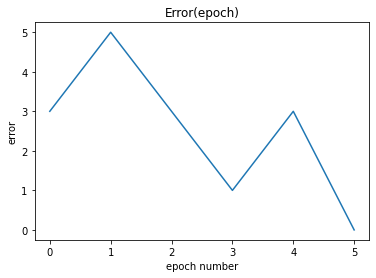

In [18]:
net = SoftsignNet()        
L_iter = []
idxs = [0, 4, 8, 15]
for epoch in range(EPOCH_NUMBER):
    error_on_train = 0.
    print("\n\tEpoch ", epoch)
    for i in idxs:
        x = [X1[i], X2[i], X3[i], X4[i]]
        y_true = Y[i]
        y_predicted = net.forward(x)
        delta = loss(y_true, y_predicted)
        error_on_train += abs(delta)
        net.backward(delta, lr)
    Y_predicted = predict_for_softsign(X_test)
    error_on_test = np.sum(np.abs(loss(Y_predicted, Y)))
    L_iter.append(error_on_test)
    print("W = ", net.W)
    print("Y = ", Y_predicted)
    print("E = ", error_on_test)
    if (error_on_test == 0):
        break

print("\nfinal W = ", net.W)
fig, ax = plt.subplots()
ax.plot(L_iter)
ax.set_xlabel('epoch number')
ax.set_ylabel('error')
ax.set_title('Error(epoch)')